## Lab Practical on Pricipal Component Analysis and K-Nearest Neighbor

### Name: G.Sri Sai Adarsh
### Roll.No: 2248106

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

In [3]:
data=load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
df=pd.DataFrame(data['data'],columns=data['feature_names'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [11]:
scaled_data=scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [13]:
scaled_data.shape

(569, 30)

In [14]:
pca=PCA(n_components=2).fit(scaled_data)

In [15]:
pca_data=pca.transform(scaled_data)

In [16]:
pca_data.shape

(569, 2)

Text(0, 0.5, 'Second principle component')

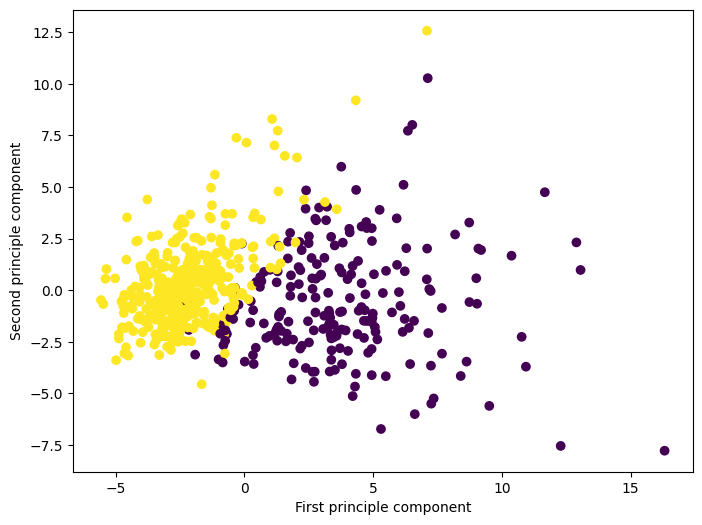

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0],pca_data[:,1],c=data['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [18]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.44272026 0.18971182]


 These two principal components together explain a total of approximately  
 63.27% of the total variance in the original dataset.

The fact that the explained variance ratio is relatively large suggests that the dataset has underlying patterns that can be captured by PCA. The first principal component captures the most variance and may correspond to the most significant underlying pattern in the data, while the second principal component captures additional variance and may correspond to a secondary pattern or signal in the data. These patterns can be used to reduce the dimensionality of the dataset or to perform further analysis.

In [55]:
# KNN for Original Data
X=data.data
y=data.target
x_train,x_test,y_train,y_test=tts(X,y,test_size=0.25,random_state=6)

In [56]:
# Initialize a KNN classifier
knn = KNN(n_neighbors=2).fit(x_train,y_train)

In [57]:
print("The Train Accuracy of the KNN model is:",knn.score(x_train,y_train))
print("The Test Accuracy of the KNN model is:",knn.score(x_test,y_test))
print("The Train Error of the KNN model is:",1-knn.score(x_train,y_train))
print("The Test Error of the KNN model is:",1-knn.score(x_test,y_test))

The Train Accuracy of the KNN model is: 0.9671361502347418
The Test Accuracy of the KNN model is: 0.9230769230769231
The Train Error of the KNN model is: 0.032863849765258246
The Test Error of the KNN model is: 0.07692307692307687


In [58]:
for i in range(1,8):
  knn = KNN(n_neighbors=i).fit(x_train,y_train)
  print("Training accuracy of KNN with neighbors={}: {:.4f}".format(
          i, knn.score(x_train, y_train)))
  print("Test accuracy of KNN with neighbors={}: {:.4f}".format(
          i, knn.score(x_test, y_test)),"\n")

Training accuracy of KNN with neighbors=1: 1.0000
Test accuracy of KNN with neighbors=1: 0.9231 

Training accuracy of KNN with neighbors=2: 0.9671
Test accuracy of KNN with neighbors=2: 0.9231 

Training accuracy of KNN with neighbors=3: 0.9554
Test accuracy of KNN with neighbors=3: 0.9510 

Training accuracy of KNN with neighbors=4: 0.9554
Test accuracy of KNN with neighbors=4: 0.9371 

Training accuracy of KNN with neighbors=5: 0.9437
Test accuracy of KNN with neighbors=5: 0.9371 

Training accuracy of KNN with neighbors=6: 0.9413
Test accuracy of KNN with neighbors=6: 0.9441 

Training accuracy of KNN with neighbors=7: 0.9390
Test accuracy of KNN with neighbors=7: 0.9510 



Based on the training and test accuracies, the best KNN model is the one with n_neighbors=3, which has a high test accuracy of 0.9510 and a reasonably high training accuracy of 0.9554. This suggests that the model is generalizing well to new, unseen data and is not overfitting to the training data.

In [59]:
knn=KNN(n_neighbors=3).fit(x_train,y_train)

In [60]:
print("The Train Accuracy of the KNN model is:",knn.score(x_train,y_train))
print("The Test Accuracy of the KNN model is:",knn.score(x_test,y_test))
print("The Train Error of the KNN model is:",1-knn.score(x_train,y_train))
print("The Test Error of the KNN model is:",1-knn.score(x_test,y_test))

The Train Accuracy of the KNN model is: 0.9553990610328639
The Test Accuracy of the KNN model is: 0.951048951048951
The Train Error of the KNN model is: 0.04460093896713613
The Test Error of the KNN model is: 0.04895104895104896


In [61]:
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        66
           1       0.94      0.97      0.96        77

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [65]:
# Performing Logistic Regression
logistic_model=LogR(max_iter=1000).fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
print("The Train Accuracy of the Logistic model is:",logistic_model.score(x_train,y_train))
print("The Test Accuracy of the Logistic model is:",logistic_model.score(x_test,y_test))
print("The Train Error of the Logistic model is:",1-logistic_model.score(x_train,y_train))
print("The Test Error of the Logistic model is:",1-logistic_model.score(x_test,y_test))

The Train Accuracy of the Logistic model is: 0.9483568075117371
The Test Accuracy of the Logistic model is: 0.958041958041958
The Train Error of the Logistic model is: 0.05164319248826288
The Test Error of the Logistic model is: 0.04195804195804198


Based on the test and train accuracies, it seems that the logistic regression model outperforms the KNN model on this particular dataset. The logistic regression model has a higher test accuracy of 0.958 compared to the KNN model's test accuracy of 0.951. Additionally, the logistic regression model has a lower test error of 0.042 compared to the KNN model's test error of 0.049.

### Optional

In [67]:
x1_train,x1_test,y1_train,y1_test=tts(pca_data,y,test_size=0.3,random_state=6)

In [69]:
logistic_pca=LogR(max_iter=1000).fit(x1_train,y1_train)

In [72]:
print("The Train Accuracy of the Logistic model with dimension reduction is:",logistic_pca.score(x1_train,y1_train))
print("The Test Accuracy of the Logistic model with dimension reduction is:",logistic_pca.score(x1_test,y1_test))
print("The Train Error of the Logistic model with dimension reduction is:",1-logistic_pca.score(x1_train,y1_train))
print("The Test Error of the Logistic model with dimension reduction is:",1-logistic_pca.score(x1_test,y1_test))

The Train Accuracy of the Logistic model with dimension reduction is: 0.9472361809045227
The Test Accuracy of the Logistic model with dimension reduction is: 0.9473684210526315
The Train Error of the Logistic model with dimension reduction is: 0.05276381909547734
The Test Error of the Logistic model with dimension reduction is: 0.052631578947368474


The logistic regression model with dimension reduction has a test accuracy of 0.947, while the logistic regression model without dimension reduction has a higher test accuracy of 0.958. Therefore, the logistic regression model without dimension reduction is the better model for this problem.



However, the accuracy of both the models are similar and hence we can say that using PCA has a very little difference on the model.
The model performed almost similarly with 30 variables and 2 variables obtained using Dimensionality reduction.